# Back to basics
The name and structure of Neural networks, also known as artificial neural networks (ANNs) are inspired by the human brain, mimicking the way that biological neurons signal to one another.

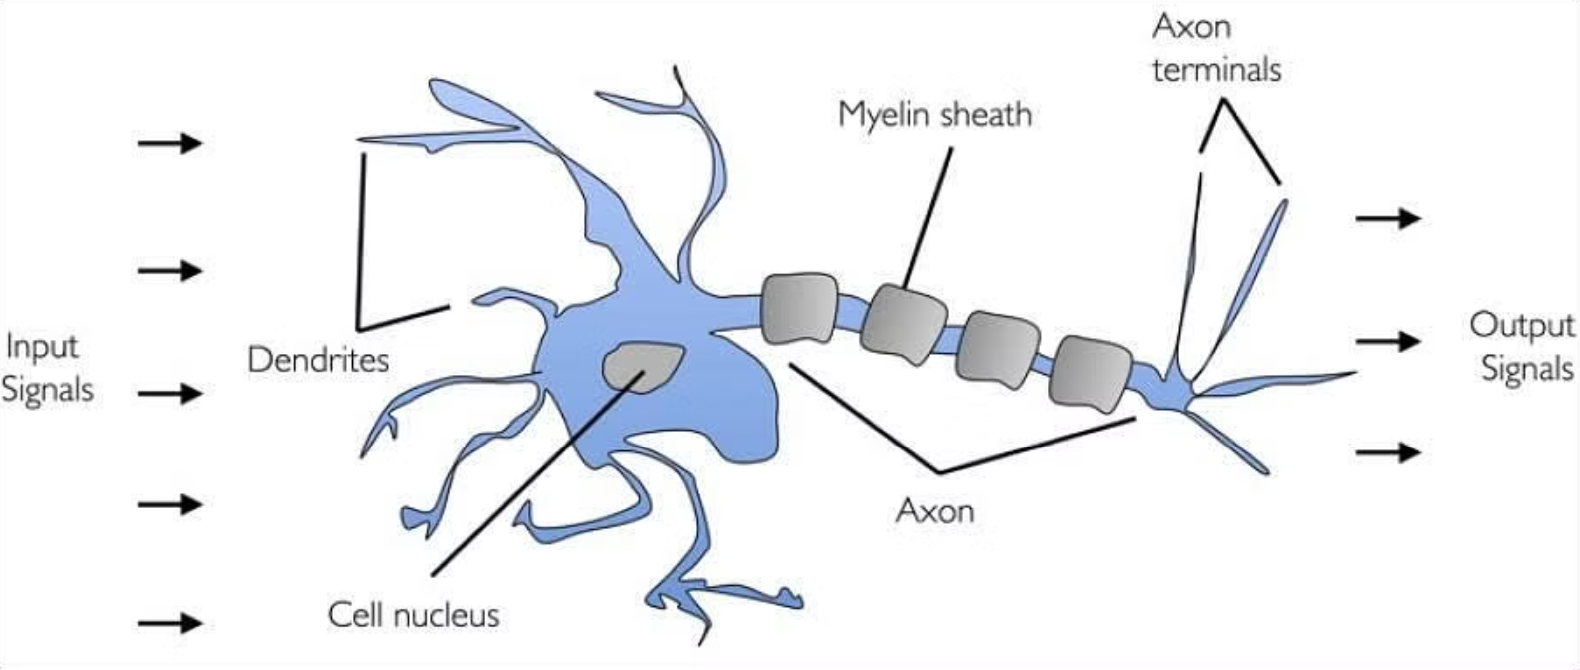

Neural networks are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron

# Fully Connected Networks
This week we will look at **Fully Connected Networks**, commonly called **FCNs** or **MLPs**. 

> A detailed look at fully connected neural networks
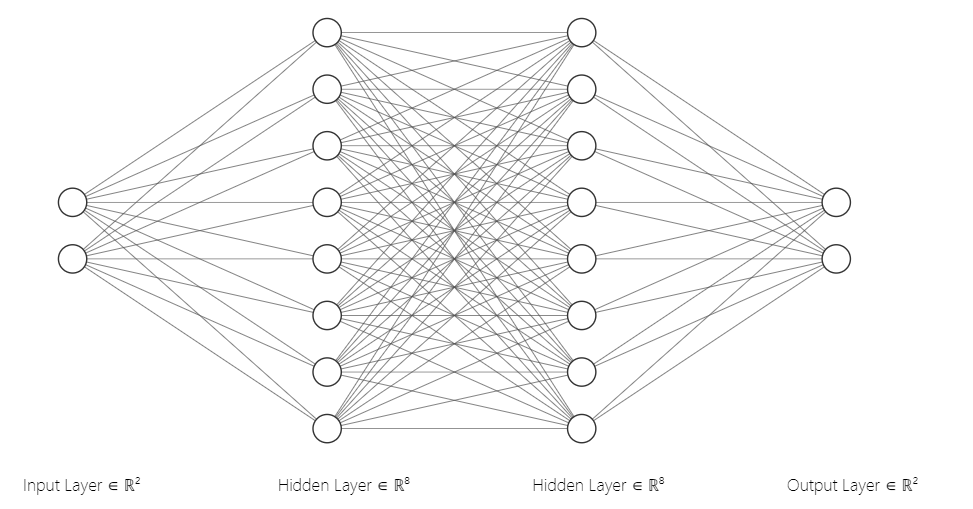

## Terminology
For a simple MLP we have three types of layers
1. The input layer. Each node is a dimension of our input (a 28x28 grayscale image would have 784 input nodes!).
2. Hidden layers. Where all the processing takes place, can be written as a matrix multiplication. You will see more details later.
3. The output layer. One node per dimension of the output space. For a binary classification task we would have two nodes. When you want to have a 28x28 image output, you would have 784 output nodes.



## Mathematics (matrix form) of a simple MLP

We will look at an example of a simple "3-layer" MLP. We usually include the input and output layers in this count, so this would have a single input layer, a single hidden layer, and a single output layer.

In our example we will be classifying points into two categories using their x and y position. 

Specifically we will be using a point set like this:

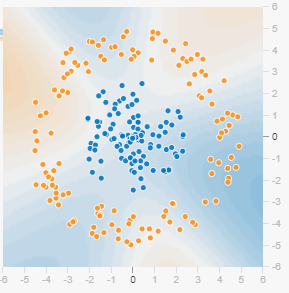

Say we have a three layer MLP with a hidden layer which uses six units.


> Model Architecture

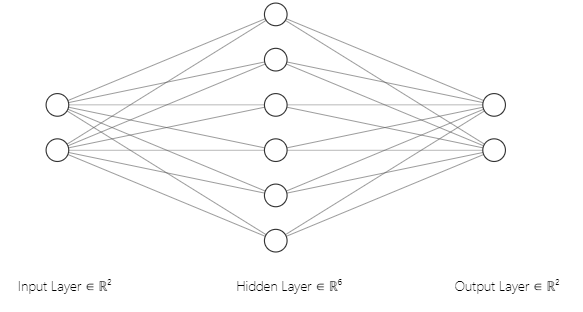


### Matrix Math

**Input Layer**
$$data = \begin{bmatrix}
x_1 & x_2
\end{bmatrix}
$$

**Input to Hidden**
$$hidden_1 = \begin{bmatrix}
h_{1,1} & h_{1,2} & h_{1,3} & h_{1,4} & h_{1,5} & h_{1,6}\\
h_{2,1} & h_{2,2} & h_{2,3} & h_{2,4} & h_{2,5} & h_{1,6}\\
\end{bmatrix}
$$

**Hidden to Output**
$$hidden_2 = \begin{bmatrix}
h_{1,1} & h_{1,2}\\
h_{2,1} & h_{2,2}\\
h_{3,1} & h_{3,2}\\
h_{4,1} & h_{4,2}\\
h_{5,1} & h_{5,2}\\
h_{6,1} & h_{6,2}\\
\end{bmatrix}
$$


**Output Layer**
$$output = \begin{bmatrix}
o_1 & o_2
\end{bmatrix} 
$$
**All together**
$$\begin{bmatrix}
o_1 & o_2
\end{bmatrix} = \begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
h_{1,1} & h_{1,2} & h_{1,3} & h_{1,4} & h_{1,5} & h_{1,6}\\
h_{2,1} & h_{2,2} & h_{2,3} & h_{2,4} & h_{2,5} & h_{1,6}\\
\end{bmatrix}
\begin{bmatrix}
h_{1,1} & h_{1,2}\\
h_{2,1} & h_{2,2}\\
h_{3,1} & h_{3,2}\\
h_{4,1} & h_{4,2}\\
h_{5,1} & h_{5,2}\\
h_{6,1} & h_{6,2}\\
\end{bmatrix}
$$

### Matrix Math in python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(size=[1, 2])
hidden_1 = np.random.uniform(size=[2, 6])
hidden_2 = np.random.uniform(size=[6, 2])

In [2]:
hidden_state = data@hidden_1
output = hidden_state@hidden_2
output

array([[1.09250282, 0.97115184]])

According to associative law of matrix multiplication, we can also do

In [3]:
# but what if we "pre-computed" the transformation of the hidden layer
fake_hidden = hidden_1@hidden_2
fake_output = data@fake_hidden
fake_output

array([[1.09250282, 0.97115184]])

It is the same! So we could have replaced our two weight matrices by just one weight matrix. 

What are we missing?? 

The non-linearity of course!!

Non-linearities are super important. A series of matrix multiplications is still just a linear combination and can be represented by a single matrix multiplication (`hidden_1@hidden_2` could be represented by a single matrix). Non-linearity is the difference between wasteful matrix multiplications and useful computations.

In [4]:
hidden_state = np.tanh(data@hidden_1)
output = hidden_state@hidden_2
output

array([[1.02016619, 0.89734126]])

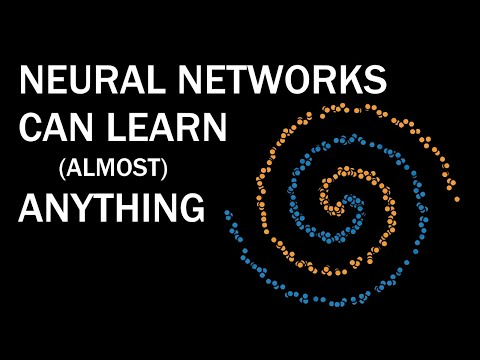

In [5]:
#@title Watch this video explaining how non-linearity works.
# https://www.youtube.com/watch?v=0QczhVg5HaI

from IPython.display import YouTubeVideo
YouTubeVideo('0QczhVg5HaI')

# Tensorflow in short

Let's build a model in tensorflow very quickly. 

In tensorflow, we have a number of `layers` which form a `model`. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. Layers will perform operations on the input [tensor](https://www.tensorflow.org/guide/tensor) to produce output which either serves as the input to the next layer or is final output of the model.



In [6]:
import tensorflow as tf

2023-02-14 19:55:59.007352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 19:56:04.024993: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-14 19:56:04.025091: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-14 19:56:04.025102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

The most common and most powerful way to build Keras models is the Functional API. To build models with the Functional API, you start by specifying the shape (and optionally the dtype) of your inputs. If any dimension of your input can vary, you can specify it as None. For instance, an input for 200x200 RGB image would have shape (200, 200, 3), but an input for RGB images of any size would have shape (None, None, 3).

In [7]:
input_size = (1, 2)
input_layer = tf.keras.layers.Input(input_size) # I have not defined the input size but you can replace it with whatever your input size is

After defining your input(s), you can chain layer transformations on top of your inputs, until your final output:

In [8]:
hidden_layer = tf.keras.layers.Dense(6)(input_layer) 
# notice how the layers are used we first instantiate the layer by giving the parameters we want
output = tf.keras.layers.Dense(2, activation='softmax')(hidden_layer) # then we provide the input in the next bracket

2023-02-14 19:56:12.287885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:56:12.288320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:56:12.288660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:56:12.288996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:56:12.323418: I tensorflow/compiler/xla/stream_executo

Once you have defined the sequence of layers that turns your input(s) into your outputs, instantiate a Model object:

In [9]:
model = tf.keras.Model(inputs=input_layer, outputs=output)

This model behaves basically like a bigger layer. You can call it on batches of data, like this:

In [10]:
data = np.random.randint(0, 256, size=input_size).astype("float32") # I have not defined the input size but you can replace it with whatever your input size is
data = np.expand_dims(data, axis=0)
processed_data = model(data)

2023-02-14 19:56:15.565144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


The Functional API also makes it easy to build models that have multiple inputs (for instance, an image and its metadata) or multiple outputs (for instance, predicting the class of the image and the likelihood that a user will click on it). For a deeper dive into what you can do, see the [guide to the Functional API](https://keras.io/guides/functional_api/).

The next step is to train your model on your data. The Model class features a built-in training loop, the `fit()` method. It accepts Dataset objects, Python generators that yield batches of data, or NumPy arrays.

Before you can call `fit()`, you need to specify an optimizer and a loss function. There are inbuilt optimizers and loss functions that you can use by passing a string to the `compile` method. You can also provide a list of metrics to be calculated and monitored. Again, you can pass functions which define your metrics, or use inbuilt metrics by passing a string instead.

In [11]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 2)]            0         
                                                                 
 dense (Dense)               (None, 1, 6)              18        
                                                                 
 dense_1 (Dense)             (None, 1, 2)              14        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


Once your model is compiled, you can start "fitting" the model to the data. Here's what fitting a model looks like with NumPy data:

Besides the data, you have to specify two key parameters: the `batch_size` and the number of `epochs` (iterations on the entire data). Here our data will get sliced on batches of 32 samples, and the model will iterate 10 times over the data during training.

In [13]:
tf.config.run_functions_eagerly(True)

In [14]:
numpy_array_of_samples = np.random.randint(0, 256, size=(32, 1, 2)).astype("float32")
numpy_array_of_labels = np.random.randint(0, 2, size=(32, 1, 2))

model.fit(numpy_array_of_samples, numpy_array_of_labels, batch_size=32, epochs=10)

Epoch 1/10


/hpc/group/rescomp/sg623/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 155ms/step - loss: 112.5499 - acc: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 80.7914 - acc: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: 31.7205 - acc: 0.3125
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 35.2791 - acc: 0.3125
Epoch 5/10
1/1 [==============================] - 0s 19ms/step - loss: 17.1660 - acc: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 9.6167 - acc: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 3.2338 - acc: 0.5938
Epoch 8/10
1/1 [==============================] - 0s 19ms/step - loss: 4.4334 - acc: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 19ms/step - loss: 4.5183 - acc: 0.2500
Epoch 10/10
1/1 [==============================] - 0s 19ms/step - loss: 18.0882 - acc: 0.7500


Once you have a trained model, you can evaluate its loss and metrics on new data via `evaluate()`, which will take in new data and corresponding labels to calculate the `metrics` for test data. Like the `fit` method, you can pass NumPy arrays to `evaluate`.

You can also simply generate predictions using either the `model.predict` or just using the `model` directly:

In [15]:
val_samples = np.random.randint(0, 256, size=(32, 1, 2)).astype("float32")
val_labels = np.random.randint(0, 2, size=(32, 1, 2))

In [16]:
loss, acc = model.evaluate(val_samples, val_labels)  # returns loss and metrics

# or, just get the predictions from new samples
predictions = model.predict(val_samples)
# also valid
predictions = model(val_samples)

1/1 [==============================] - 0s 26ms/step


That was a quick introduction to Tensorflow. In this lab, it is okay to skip over the stuff you don't fully understand regarding how tensorflow works. We will soon do Tensorflow the Hard Way.

# Binary Classification Exercise
Here, we will try out the followings.
1. Build a model using the architecture we described above using keras
2. Train the model both with and without the non-linearity on the hidden layer for 25 epochs (no GPU necessary)
3. Evaluate the model on the provided test data

Fill in the `# TODO #` sections. Useful code snippets:
```
# imports
import tensorflow as tf

# layers
input_layer = tf.keras.layers.Input(input_size)
linear_layer = tf.keras.layers.Dense(hidden_size)
nonlinear_layer = tf.keras.layers.Dense(hidden_size, activation='tanh')
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# model summary
model.summary()

# compiling/training
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
model.fit(train_x_data, train_y_data, batch_size=batch_size, epochs=epochs)

# one-hot encoding
one_hot_labels = np.eye(num_classes)[class_indices]
```

## Experiment 1 - Data 1 without non-linearity

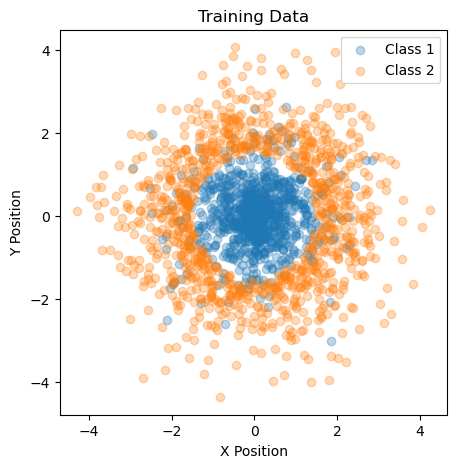

In [17]:
# data generation code
training_examples = 1000
testing_examples = 100

def generate_points(class_number, amount, mixing=1.5):
    # class number is either 1 or 2
    assert class_number in [1,2]
    amplitude = np.abs(np.random.normal(0, 1, size=amount)) + (class_number - 1)*mixing
    angle = np.random.uniform(0, 2*np.pi, size=amount)
    points = np.stack([amplitude*np.cos(angle), amplitude*np.sin(angle)], axis=-1)
    return points

class_1_data_train = generate_points(1, training_examples)
class_2_data_train = generate_points(2, training_examples)

class_1_data_test = generate_points(1, testing_examples)
class_2_data_test = generate_points(2, testing_examples)

plt.figure(figsize=(5,5))
plt.scatter(class_1_data_train[:, 0], class_1_data_train[:, 1], label='Class 1', alpha=0.3)
plt.scatter(class_2_data_train[:, 0], class_2_data_train[:, 1], label='Class 2', alpha=0.3)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Training Data")
plt.legend()

In [18]:
# training code
import tensorflow as tf
# although we only have one "hidden layer", we end up having two transformations
# first to get from the input to the hidden layer
# second to get from the hidden layer to the output
def build_model():
    input_layer = tf.keras.layers.Input([2])
    hidden_layer = tf.keras.layers.Dense(6)(input_layer)
    output = tf.keras.layers.Dense(2, activation='softmax')(hidden_layer)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

linear_model = build_model()

train_x = np.concatenate([class_1_data_train, class_2_data_train])
test_x = np.concatenate([class_1_data_test, class_2_data_test])
# the operation of [0]*N, where "N" is a number is a quick way of creating a list which has N elements in it, with each element being 0
# Reminder that we can concatenate two lists by using addition (list_1 + list_2)
train_y = np.eye(2)[np.array([0]*len(class_1_data_train) + [1]*len(class_2_data_train))]
test_y = np.eye(2)[np.array([0]*len(class_1_data_test) + [1]*len(class_2_data_test))]

# if you don't specify the optimizer it will default to "rmsprop", an adaptive version of SGD. For most applications that is good enough to start
linear_model.compile(loss='binary_crossentropy')

linear_model.fit(train_x, train_y, epochs=25)

linear_loss = linear_model.evaluate(test_x, test_y)
print("linear loss", linear_loss)

Epoch 1/25
63/63 [==============================] - 1s 15ms/step - loss: 0.7625
Epoch 2/25
63/63 [==============================] - 1s 14ms/step - loss: 0.7145
Epoch 3/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6968
Epoch 4/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6936
Epoch 5/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6933
Epoch 6/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6932
Epoch 7/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6934
Epoch 8/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6933
Epoch 9/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6933
Epoch 10/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6933
Epoch 11/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6933
Epoch 12/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6933
Epoch 13/25
63/63 [==================

## ⏰ Experiment 2 - Data 1 with non-linearity (tanh)

Let's add non-linearlity into the hidden layer. You just need to modify one line from previous code. To add tanh activation to the hidden_layer, what should we do? You can also read document:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [19]:
import tensorflow as tf
# although we only have one "hidden layer", we end up having two transformations
# first to get from the input to the hidden layer
# second to get from the hidden layer to the output
def build_model(linear=False):
    input_layer = tf.keras.layers.Input([2])
    hidden_layer = tf.keras.layers.Dense(6, activation='relu')(input_layer)
    output = tf.keras.layers.Dense(2, activation='softmax')(hidden_layer)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

nonlinear_model = build_model(False)

train_x = np.concatenate([class_1_data_train, class_2_data_train])
test_x = np.concatenate([class_1_data_test, class_2_data_test])
# the operation of [0]*N, where "N" is a number is a quick way of creating a list which has N elements in it, with each element being 0
# Reminder that we can concatenate two lists by using addition (list_1 + list_2)
train_y = np.eye(2)[np.array([0]*len(class_1_data_train) + [1]*len(class_2_data_train))]
test_y = np.eye(2)[np.array([0]*len(class_1_data_test) + [1]*len(class_2_data_test))]

# if you don't specify the optimizer it will default to "rmsprop", an adaptive version of SGD. For most applications that is good enough to start
nonlinear_model.compile(loss='binary_crossentropy')

nonlinear_model.fit(train_x, train_y, epochs=25)

nonlinear_loss = nonlinear_model.evaluate(test_x, test_y)
print("nonlinear loss", nonlinear_loss)

Epoch 1/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6495
Epoch 2/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6239
Epoch 3/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6050
Epoch 4/25
63/63 [==============================] - 1s 14ms/step - loss: 0.5887
Epoch 5/25
63/63 [==============================] - 1s 14ms/step - loss: 0.5742
Epoch 6/25
63/63 [==============================] - 1s 14ms/step - loss: 0.5610
Epoch 7/25
63/63 [==============================] - 1s 14ms/step - loss: 0.5487
Epoch 8/25
63/63 [==============================] - 1s 13ms/step - loss: 0.5368
Epoch 9/25
63/63 [==============================] - 1s 13ms/step - loss: 0.5257
Epoch 10/25
63/63 [==============================] - 1s 13ms/step - loss: 0.5145
Epoch 11/25
63/63 [==============================] - 1s 13ms/step - loss: 0.5033
Epoch 12/25
63/63 [==============================] - 1s 13ms/step - loss: 0.4918
Epoch 13/25
63/63 [==================

##Experiment 3 - Data 1 with nice visualization
Now that you've done it by hand. Lets take a look at some examples from Tensorflow's website. Each of these links will take you to a specific configuration. Press play to watch the optimizer do it's thing. 

1.  [Linear visualization](https://playground.tensorflow.org/#activation=linear&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.46980&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
2. [Tanh visualization](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.46980&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## Exxperiment 4 - Data 2 with non-linearity (tanh)

Now we will move to a more advanced example. Classifying spiral data. You can see the example here:
[Spiral Data](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.10492&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Try it out and see how we can't use our old model to do the classification.

You can play around more and try to get an intuition for what is happening.

Text(0, 0.5, 'Y Position')

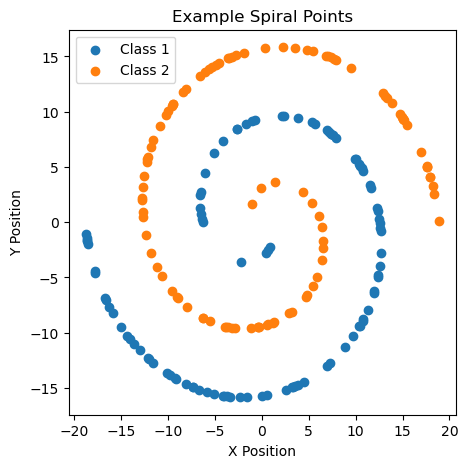

In [20]:
def create_spiral_points(class_number, amount):
    assert class_number in [1,2]
    theta = np.sqrt(np.random.rand(amount))*3*np.pi
    if class_number == 1:
        radius = 2*theta
    else:
        radius = -2*theta
    data = np.array([np.cos(theta)*radius, np.sin(-theta)*radius]).T
    return data

# example usage
spiral_points_class_1 = create_spiral_points(1, 100)
spiral_points_class_2 = create_spiral_points(2, 100)

plt.figure(figsize=(5,5))
plt.scatter(spiral_points_class_1[:, 0], spiral_points_class_1[:,1], label="Class 1")
plt.scatter(spiral_points_class_2[:, 0], spiral_points_class_2[:,1], label="Class 2")
plt.legend()
plt.title("Example Spiral Points")
plt.xlabel("X Position")
plt.ylabel("Y Position")

In [21]:
import tensorflow as tf
# although we only have one "hidden layer", we end up having two transformations
# first to get from the input to the hidden layer
# second to get from the hidden layer to the output
def build_model():
    input_layer = tf.keras.layers.Input([2])
    hidden_layer = tf.keras.layers.Dense(6, activation='tanh')(input_layer)
    output = tf.keras.layers.Dense(2, activation='softmax')(hidden_layer)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

nonlinear_model = build_model()

class_1_data_train = create_spiral_points(1, 1000)
class_2_data_train = create_spiral_points(2, 1000)

class_1_data_test = create_spiral_points(1, 100)
class_2_data_test = create_spiral_points(2, 100)

train_x = np.concatenate([class_1_data_train, class_2_data_train])
test_x = np.concatenate([class_1_data_test, class_2_data_test])
# the operation of [0]*N, where "N" is a number is a quick way of creating a list which has N elements in it, with each element being 0
# Reminder that we can concatenate two lists by using addition (list_1 + list_2)
train_y = np.eye(2)[np.array([0]*len(class_1_data_train) + [1]*len(class_2_data_train))]
test_y = np.eye(2)[np.array([0]*len(class_1_data_test) + [1]*len(class_2_data_test))]

# if you don't specify the optimizer it will default to "rmsprop", an adaptive version of SGD. For most applications that is good enough to start
nonlinear_model.compile(loss='binary_crossentropy')

nonlinear_model.fit(train_x, train_y, epochs=25)

nonlinear_loss = nonlinear_model.evaluate(test_x, test_y)
print("nonlinear loss", nonlinear_loss)

Epoch 1/25
63/63 [==============================] - 1s 14ms/step - loss: 0.7294
Epoch 2/25
63/63 [==============================] - 1s 14ms/step - loss: 0.7044
Epoch 3/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6873
Epoch 4/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6754
Epoch 5/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6669
Epoch 6/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6606
Epoch 7/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6558
Epoch 8/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6523
Epoch 9/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6495
Epoch 10/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6474
Epoch 11/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6457
Epoch 12/25
63/63 [==============================] - 1s 14ms/step - loss: 0.6444
Epoch 13/25
63/63 [==================

## ⏰ Experiment 5 - Data 2 + Noise with non-linearity (tanh)
Finally, let's add noise on the spiral data to make it harder.

Text(0, 0.5, 'Y Position')

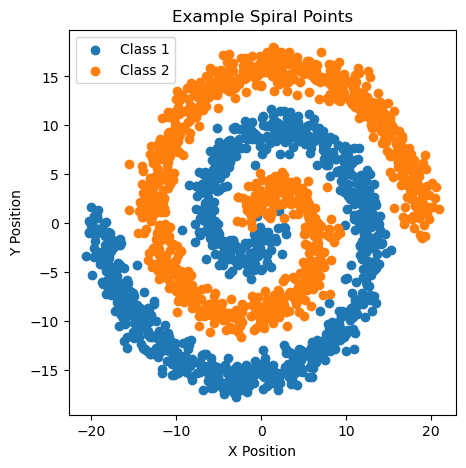

In [22]:
def create_spiral_points_noise(class_number, amount):
    assert class_number in [1,2]
    theta = np.sqrt(np.random.rand(amount))*3*np.pi
    if class_number == 1:
        radius = 2*theta
    else:
        radius = -2*theta
    data = np.array([np.cos(theta)*radius, np.sin(-theta)*radius]).T
    data += np.random.randn(amount, 2)
    return data

noise_points_class_1 = create_spiral_points_noise(1, 1000)
noise_points_class_2 = create_spiral_points_noise(2, 1000)

plt.figure(figsize=(5,5))
plt.scatter(noise_points_class_1[:, 0], noise_points_class_1[:,1], label="Class 1")
plt.scatter(noise_points_class_2[:, 0], noise_points_class_2[:,1], label="Class 2")
plt.legend()
plt.title("Example Spiral Points")
plt.xlabel("X Position")
plt.ylabel("Y Position")

With the noise, the previous single hidden node model is not enough to accurately classify two classes. Please try to add 2 more layers and see whether you can get lower loss than before!

In [23]:
import tensorflow as tf
# although we only have one "hidden layer", we end up having two transformations
# first to get from the input to the hidden layer
# second to get from the hidden layer to the output
def build_model():
    input_layer = tf.keras.layers.Input([2])
    hidden_1 = tf.keras.layers.Dense(4, activation='tanh')(input_layer)
    hidden_2 = tf.keras.layers.Dense(8, activation='tanh')(hidden_1)
    output = tf.keras.layers.Dense(2, activation='softmax')(hidden_2)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

nonlinear_model = build_model()

class_1_data_train = create_spiral_points_noise(1, 1000)
class_2_data_train = create_spiral_points_noise(2, 1000)

class_1_data_test = create_spiral_points_noise(1, 100)
class_2_data_test = create_spiral_points_noise(2, 100)

train_x = np.concatenate([class_1_data_train, class_2_data_train])
test_x = np.concatenate([class_1_data_test, class_2_data_test])
# the operation of [0]*N, where "N" is a number is a quick way of creating a list which has N elements in it, with each element being 0
# Reminder that we can concatenate two lists by using addition (list_1 + list_2)
train_y = np.eye(2)[np.array([0]*len(class_1_data_train) + [1]*len(class_2_data_train))]
test_y = np.eye(2)[np.array([0]*len(class_1_data_test) + [1]*len(class_2_data_test))]

# if you don't specify the optimizer it will default to "rmsprop", an adaptive version of SGD. For most applications that is good enough to start
nonlinear_model.compile(loss='binary_crossentropy')

nonlinear_model.fit(train_x, train_y, epochs=25)

nonlinear_loss = nonlinear_model.evaluate(test_x, test_y)
print("nonlinear loss", nonlinear_loss)

Epoch 1/25
63/63 [==============================] - 1s 16ms/step - loss: 0.7917
Epoch 2/25
63/63 [==============================] - 1s 16ms/step - loss: 0.7054
Epoch 3/25
63/63 [==============================] - 1s 16ms/step - loss: 0.6627
Epoch 4/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6492
Epoch 5/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6466
Epoch 6/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6454
Epoch 7/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6449
Epoch 8/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6442
Epoch 9/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6437
Epoch 10/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6432
Epoch 11/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6427
Epoch 12/25
63/63 [==============================] - 1s 17ms/step - loss: 0.6424
Epoch 13/25
63/63 [==================

Did you get the expected result? You do not need to answer this question. Just think about it yourself!